# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

- Currrently using conda environement set in Visual Studio Code, therefore won't be using the Google drive Mounting method


In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [3]:
# Write your code here
rows , columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 1898
Number of columns: 9


#### Observations:


From the size of number of rows and columns, we can with confidence say that this is a reasonably large dataset and contains enough information to provide meaningful insights into customer ordering behaviour and restaurant performance.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


- We observe that all the columns have appropriate data type information except for the ratings column, which should have integer data type.
- We observe that rating numeric column is incorrectly typed as objects.
- also we learn about the memory usage of the current dataframe (might be useful for future optimization).
- There are 3 Int64 data types, 4 Object data types and 1 float64 data type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [5]:
# Write your code here
# Correcting the data type of Rating column
# first we replace all the Not given values with NaN
df['rating'] = df['rating'].replace('Not Given', np.nan)

# using Int64 to allow NaN in integers 
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'] = df['rating'].astype('Int64') 
print(df['rating'].head())


0    <NA>
1    <NA>
2       5
3       3
4       4
Name: rating, dtype: Int64


Number of missing/NaN values in the dataset:
 order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


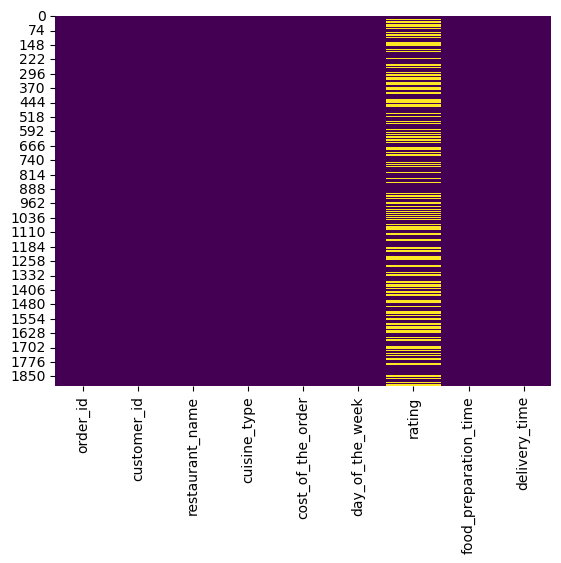

In [6]:
# Finding the number of missing values in each column
missing_values = df.isnull().sum()
print("Number of missing/NaN values in the dataset:\n", missing_values)

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Observations:


- We have removed the "Not Given" entries from the Rating column and replaced them with NaN values, as it will be beneficial for calculations if Ratings column was numeric type and not categorical type. 
- We can clearly see from the above code as well as the visualization of missing values, that the ratings column contains multiple missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# Write your code here
print("Dataset statistical summary: ")
df.describe().T

Dataset statistical summary: 


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1162.0,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [8]:
print("Minimum time to prepare food: ",df["food_preparation_time"].min())
print("Average time to prepare food: ",df["food_preparation_time"].mean())
print("Maximum time to prepare food: ",df["food_preparation_time"].max())


Minimum time to prepare food:  20
Average time to prepare food:  27.371970495258168
Maximum time to prepare food:  35


#### Observations:


The mimimum time it takes to prepare food is 20 minutes, the average time is 27.37 minutes and the maximum time is 35 minutes.

### **Question 5:** How many orders are not rated?

In [9]:
# Write the code here
unrated_orders = df['rating'].isnull().sum()

print(f"Number of orders not rated: {unrated_orders}")

Number of orders not rated: 736


#### Observations:


There are exactly 736 orders which have not received rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [10]:
# Write the code here
df["cost_of_the_order"].nunique()       # n
df["cuisine_type"].nunique()            # c
df["customer_id"].nunique()             #   id
df["day_of_the_week"].nunique()         # c
df["order_id"].nunique()                #   id
df["delivery_time"].nunique()           # n
df["food_preparation_time"].nunique()   # n
df["rating"].nunique()                  # n
df["restaurant_name"].nunique()         # c


178

In [11]:
# Categorical variables: Use count plots
categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_week']

# Numerical variables: Use histograms and boxplots
numerical_columns = ['cost_of_the_order', 'rating', 'delivery_time', "food_preparation_time"]

print("categorical columns in the dataset are:", categorical_columns)
print("numericals columns in the dataset are:", numerical_columns)

categorical columns in the dataset are: ['restaurant_name', 'cuisine_type', 'day_of_week']
numericals columns in the dataset are: ['cost_of_the_order', 'rating', 'delivery_time', 'food_preparation_time']


1) COST OF THE ORDER

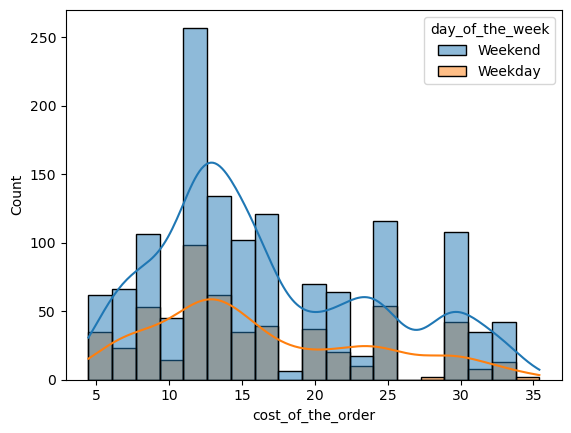

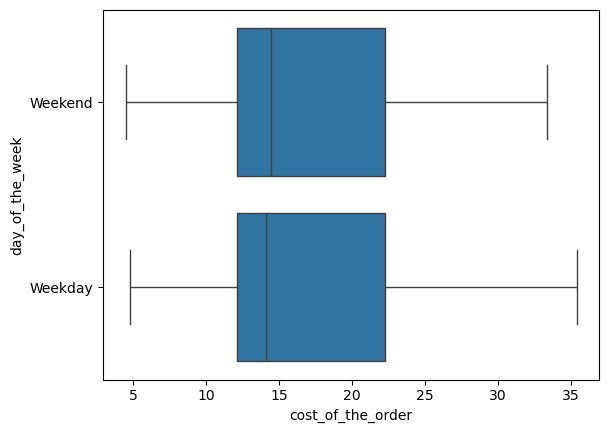

In [12]:
## Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order',hue="day_of_the_week",kde=True) 
plt.show()

## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order',y="day_of_the_week") 
plt.show() 

In [13]:
print('Median of cost_of_the_order:', df['cost_of_the_order'].median())

Median of cost_of_the_order: 14.14


- From the BOX PLOT of the variable cost_of_the_order, we can infer that the distribution is right-skewed
- From the HISTOGRAM PLOT of the variable cost_of_the_order, we can infer that the distribution is right-skewed
- The distribution indicates right skewness 
- The distribution is multimodal, it indicates a maximum around 12 dollars, then again a peak around 25 dollars and final peak at 30 dollars
- This implies changes in other qualities, such as those connected to income or demographics, and it indicates a linkage with these features.

2. Cuisine Type

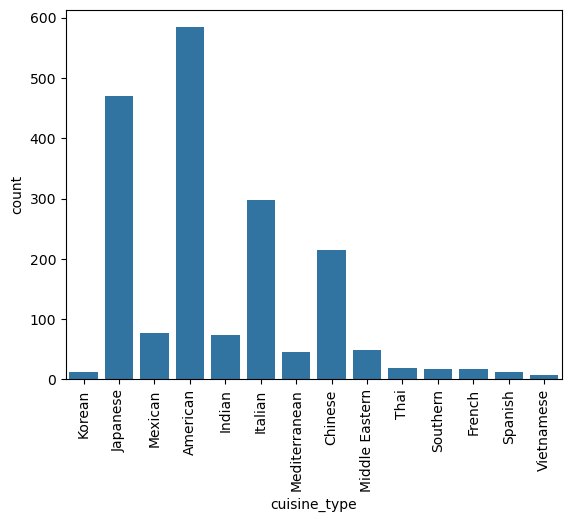

In [14]:
ax = sns.countplot(data=df, x="cuisine_type")
# Rotate x-axis ticks 
ax.tick_params(axis="x", rotation=90)
plt.show()

- The most popular cuisine types in descending order are: American, Japanese, Italian then Chinese followed by Mexican and Indian.
- These cuisines are ordered the most, therefore this knowledge will be very helpful for existing as well as new retaurants to take into account to improve their performance.

3. Rating

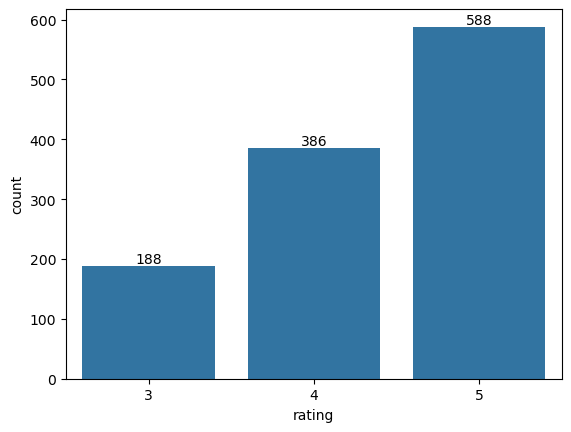

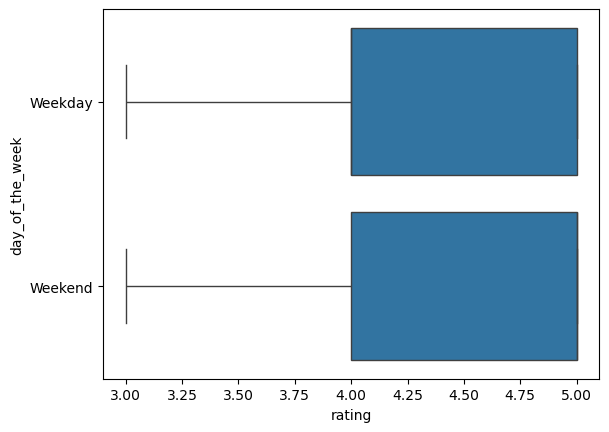

In [15]:
df_valid = df[df["rating"].notnull()]

# Count plot
ax = sns.countplot(data=df_valid, x="rating")
# Display respective counts as bar labels
ax.bar_label(ax.containers[0])
plt.show()

# Box plot
sns.boxplot(data = df_valid, x='rating', y='day_of_the_week')
plt.show()


- Ratings are skewed towards 5 and there is no rating under 3.
- This should be taken into account when assessing the importance of measurements as it may suggest a courtesy bias.

4. Food Preparation Time

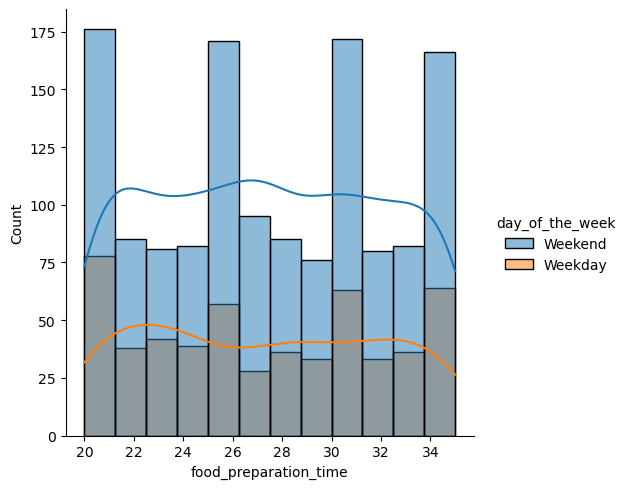

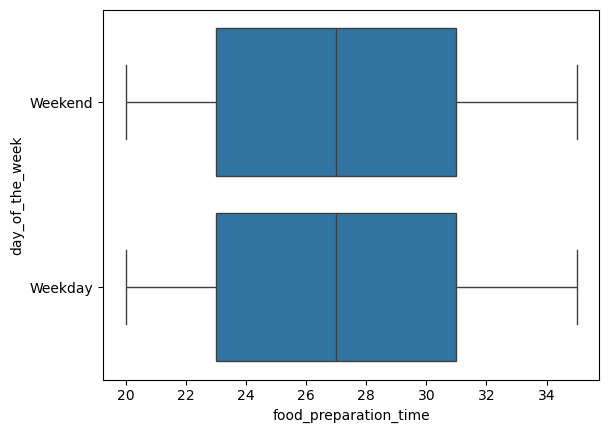

Median of food_preparation_time: 27.0
Standard deviation of food_preparation_time: 4.63


In [16]:
# Distplot overlay (by day of the week/hue)
sns.displot(data = df, x='food_preparation_time', hue='day_of_the_week', kde=True)
plt.show()

# Box plot
sns.boxplot(data = df, x='food_preparation_time', y='day_of_the_week')
plt.show()

# Print median & standard deviation
print('Median of food_preparation_time:', round(df['food_preparation_time'].median(), 2))
print('Standard deviation of food_preparation_time:', round(df['food_preparation_time'].std(), 2))

- There is no significant difference between food_preparation_time during weekends and weekdays, with a median at 27 minutes.

5. Delivered Time

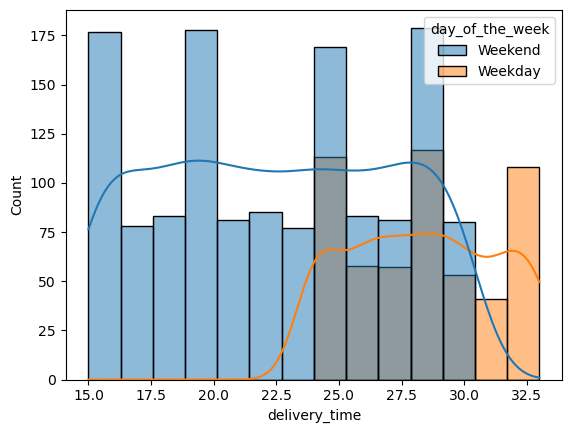

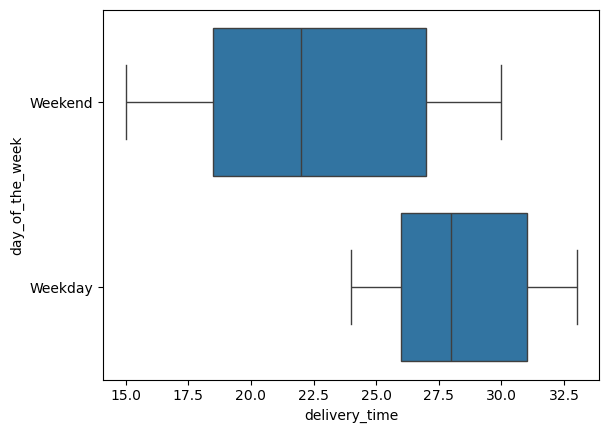

Median of delivery_time: 25.0
Standard deviation of delivery_time: 4.97


In [17]:
# Histogram overlay (by day of the week/hue)
sns.histplot(x='delivery_time', data=df, hue='day_of_the_week', kde=True)
plt.show()

# Box plot
sns.boxplot(data = df, x='delivery_time', y='day_of_the_week')
plt.show()

# Print median & standard deviation
print('Median of delivery_time:', round(df['delivery_time'].median(), 2))
print('Standard deviation of delivery_time:', round(df['delivery_time'].std(), 2))

- Delivery times are longer during weekdays as compared to weekends.
- Could indicate need of additional staffing during weekdays

6. Day Of The Week

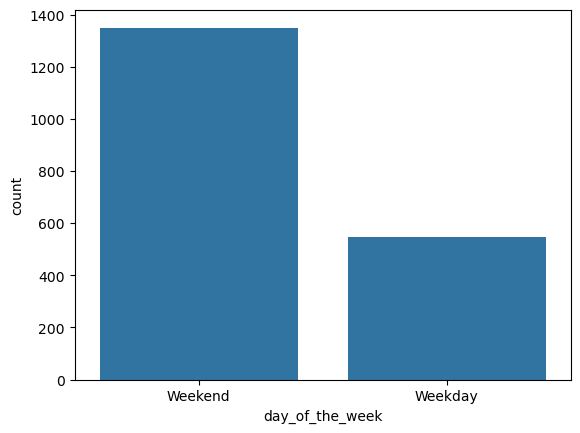

In [18]:
sns.countplot(data=df, x="day_of_the_week")
plt.show()

- Number of Orders received during weekends is significantly larger than weekdays
- This can be considered by the restaurants as well as the delivery partners for increasing optimization

7. Restaurant Name

In [19]:
# check unique restaurant name
print("Number of unique restaurants in the city are: ",df["restaurant_name"].nunique())

Number of unique restaurants in the city are:  178


8. Order ID

In [20]:
# check unique order ID
print("Total number of unique Orders are:",df['order_id'].nunique()  )

Total number of unique Orders are: 1898


9. Customer ID


In [21]:
# check unique customer ID
print("Total number of unique customer are:",df['customer_id'].nunique()  )

Total number of unique customer are: 1200


- This coud imply there are a lot of repeating customers, and can be given special discounts for their loyalty 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

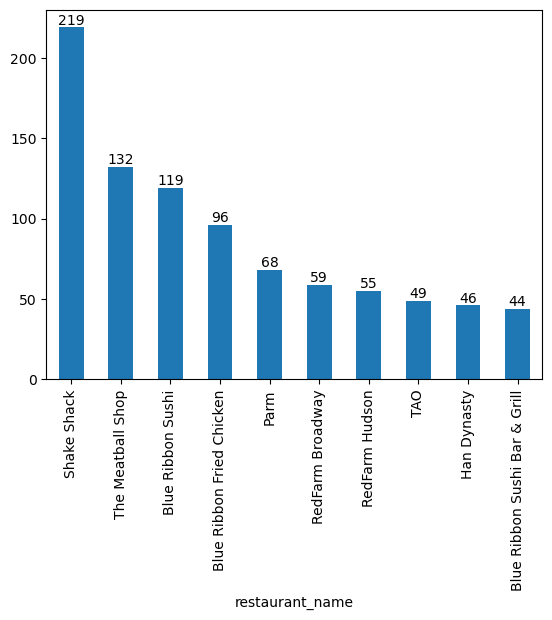

In [22]:
# Plot top ten entries for additional visibility
ax = df["restaurant_name"].value_counts().head(10).plot(x='restaurant_name', y='order_count', kind='bar')
# rotate the restaurant names
ax.tick_params(axis='x', rotation=90)
# Display respective counts as bar labels
ax.bar_label(ax.containers[0])
plt.show()

In [23]:
# Write the code here
# value_counts is used to calculate the frequency 
top_five_restaurants = df["restaurant_name"].value_counts().head(5)
print("Top 5 Restaurants based on number of orders received:")
print(top_five_restaurants)

Top 5 Restaurants based on number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


- This will give you a list of the top 5 restaurants along with the number of orders each received. These restaurants likely have a larger customer base or are more popular, providing opportunities for the business to study why they perform well

### **Question 8**: Which is the most popular cuisine on weekends?

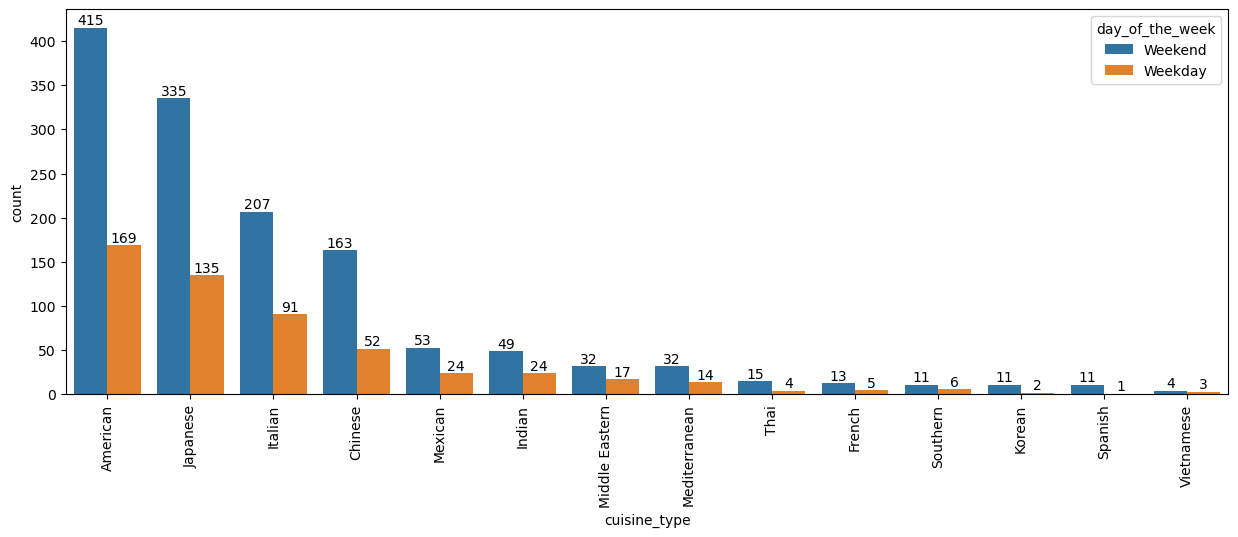

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, hue='day_of_the_week')
# rotate the cuisine type
ax.tick_params(axis='x', rotation=90)
# Display counts as bar labels for both hues
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

In [25]:
# Write the code here
# Filtering orders placed on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Finding the most popular cuisine on weekends
most_popular_cuisine_weekends = df_weekend["cuisine_type"].value_counts().idxmax()
weekend_cuisine_order_count = df_weekend["cuisine_type"].value_counts().max()

print(f"The most popular cuisine on weekends is: {most_popular_cuisine_weekends} with {weekend_cuisine_order_count} orders.")

The most popular cuisine on weekends is: American with 415 orders.


#### Observations:


- American cuisine is the most popular cuisine during both weekends and weekdays

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [26]:
# Write the code here
# data frame of orders which cost more than 20 dollars
df_more_than_20 = df[df["cost_of_the_order"] > 20]

# simple percentage calculation
percentage = (df_more_than_20.shape[0]/df.shape[0])*100

print(f"Percentage of orders costing more than 20 dollars: {percentage:.2f}%")

Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:


- 29.24% of all orders cost more than 20 dollars.
- This also implies that majority of the orders are sub 20 dollars

### **Question 10**: What is the mean order delivery time?

In [27]:
# Write the code here
mean_delivery_time = df["delivery_time"].mean()
std_delivery_time = df["delivery_time"].std()
order_delivery_ratio = std_delivery_time / mean_delivery_time

print(f"Mean order delivery time: {round(mean_delivery_time,2)} minutes")
print(f"Standard Deviation for the order delivery time: {round(std_delivery_time,2)} minutes")
print(f"Cofefficient of variation (CV) for delivery time: {round(order_delivery_ratio*100,2)} %")

Mean order delivery time: 24.16 minutes
Standard Deviation for the order delivery time: 4.97 minutes
Cofefficient of variation (CV) for delivery time: 20.58 %


#### Observations:


- Mean order delivery time is 24.16 minutes
- Standard Deviation for the order delivery time high with a 20.58% CV implying a fair degree of variation

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [28]:
# Write the code here
df_discount = df["customer_id"].value_counts().head(3)

print(f"Customers eligible for 20% discount are:\n",df_discount)

Customers eligible for 20% discount are:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


- Customer 52832, 47440 and 83287 placed 13, 10, and 9 orders respectively. 
- They are the most frequent customers, hence eligible for 20% discount

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### 1. Cuisine vs Cost of the order

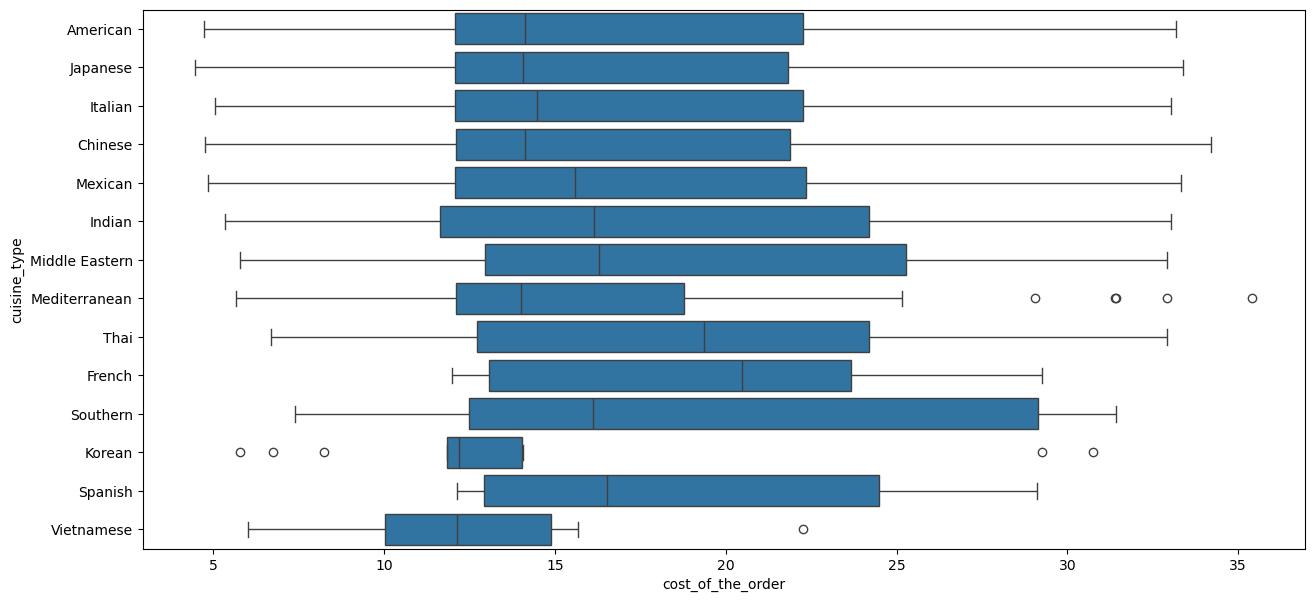

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.show()

- Consistent spreads among the most commonly ordered cuisine varieties indicate, for instance, that cost and cost spread may play a role in their appeal.
- Interestingly, there are some cuisine kinds that are not as popular to order that have significantly different pricing and cost spreads.
- Further investigation is recommended. It's likely that the price range of the best-performing cuisine kinds could communicate to clients an acceptable or preferred value.

#### 2. Cuisine vs Food Preparation time

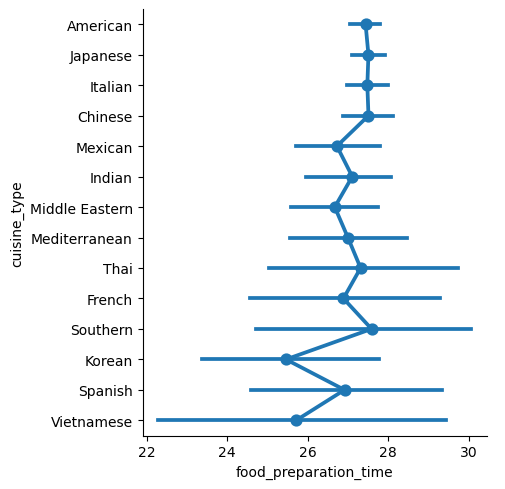

In [30]:
sns.catplot(data=df, x='food_preparation_time', y='cuisine_type', kind='point', order=df['cuisine_type'].value_counts().index)
plt.show()

- Strong consistency in the amount of time required to prepare several of the most popular food varieties suggests that this may also play a role in their appeal.

#### 3. Day of the Week vs Delivery time

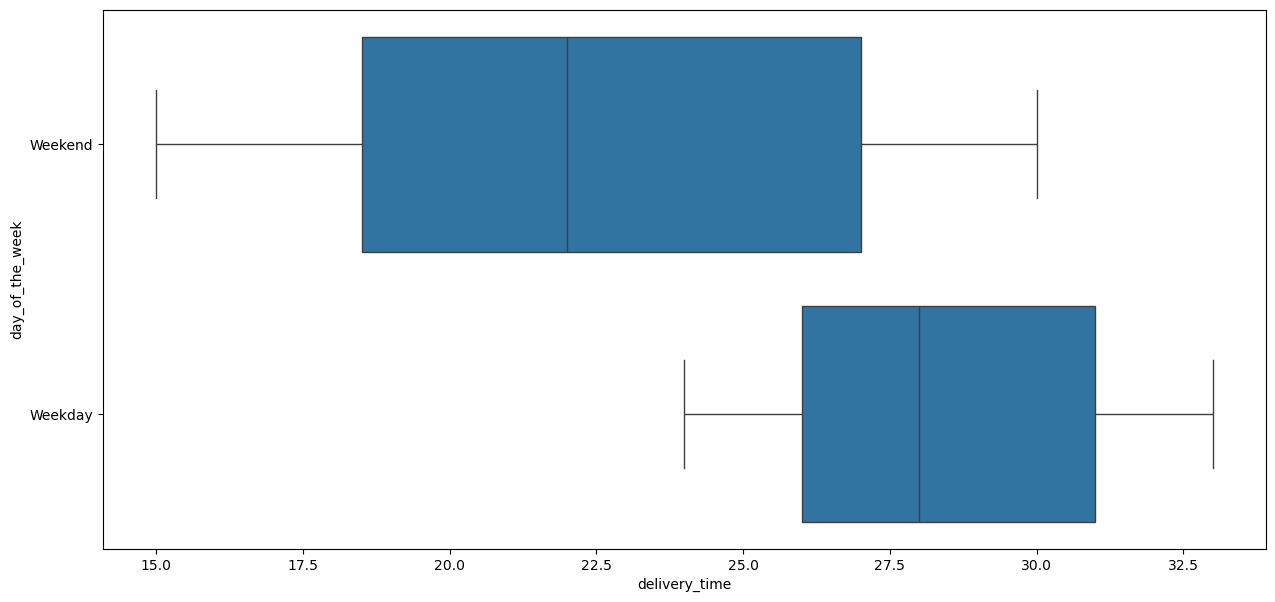

In [31]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x="delivery_time",y="day_of_the_week") 
plt.show()

- We can clearly infer that the delivery times during weekdays are much more longer than the weekends

#### 4. Rating vs Delivery time

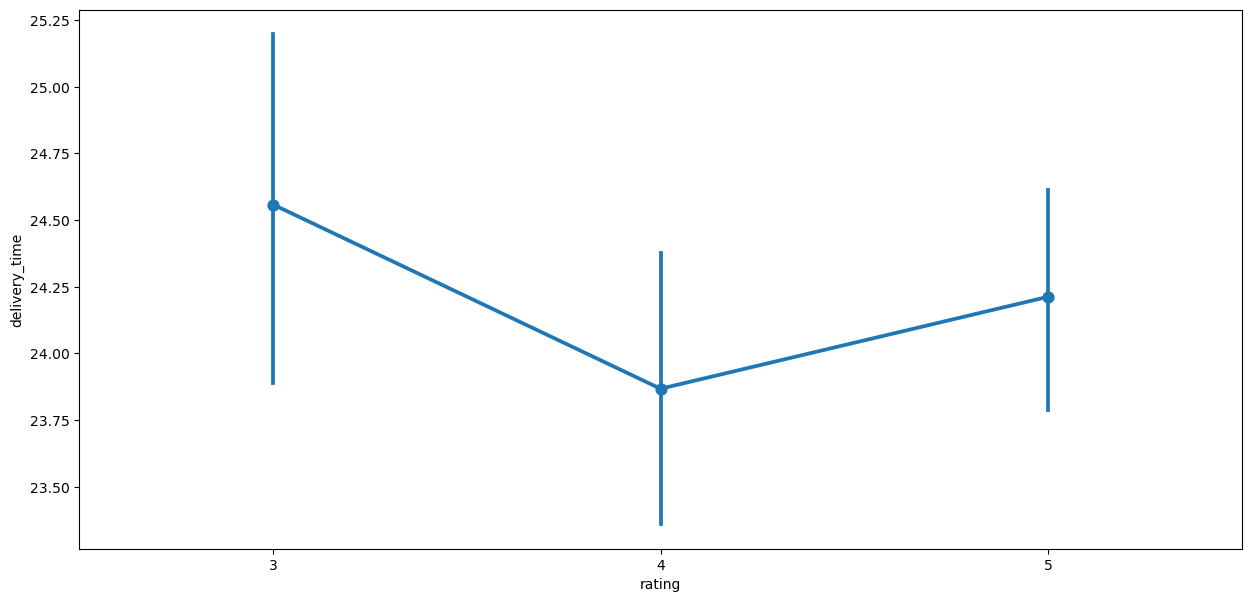

In [32]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

- lower rating is consistent with longer delivery times
- but higher rating dont necessarily mean lower delivery times

#### 5. Rating vs Food preparation time

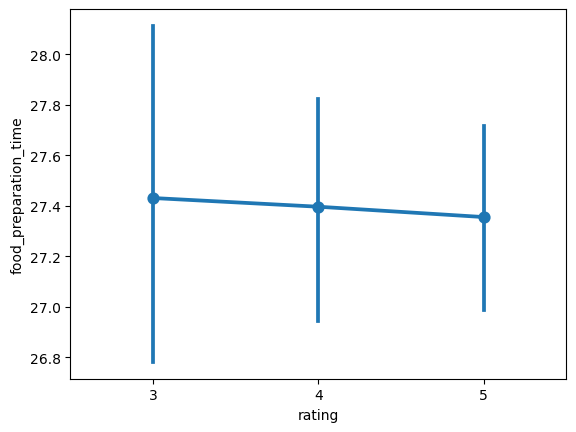

In [33]:
# Relationship between rating and food preparation time
sns.pointplot(data=df, x="rating", y="food_preparation_time")  
plt.show()


- The graph does imply more consistent Food preparation time is means better ratings

#### 6. Rating vs Cost of the order

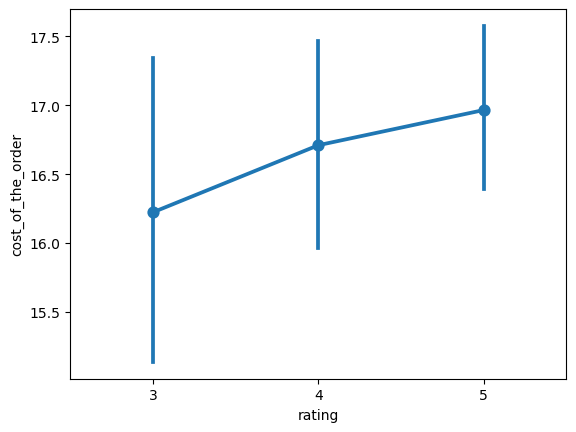

In [34]:
# Relationship between rating and cost of the order
sns.pointplot(data=df, x="rating", y="cost_of_the_order")   
plt.show()


- higher ratings have higher cost of order
- lower rating have a huge variation in cost of order

#### 7. Correlation among variables

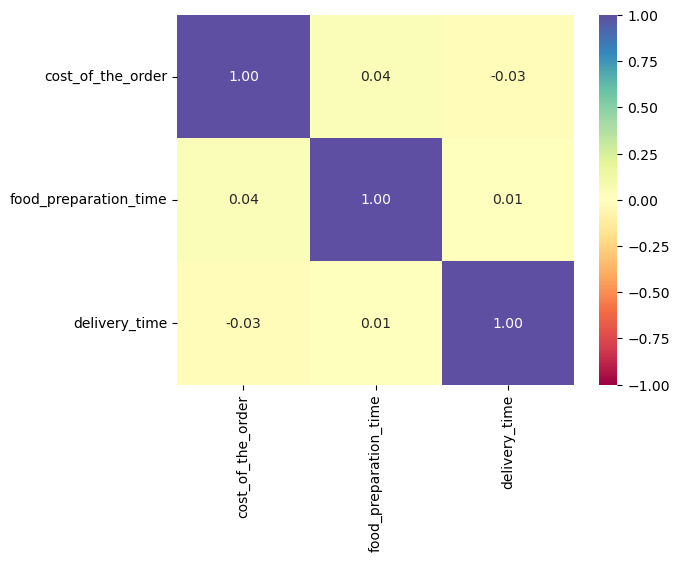

In [35]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

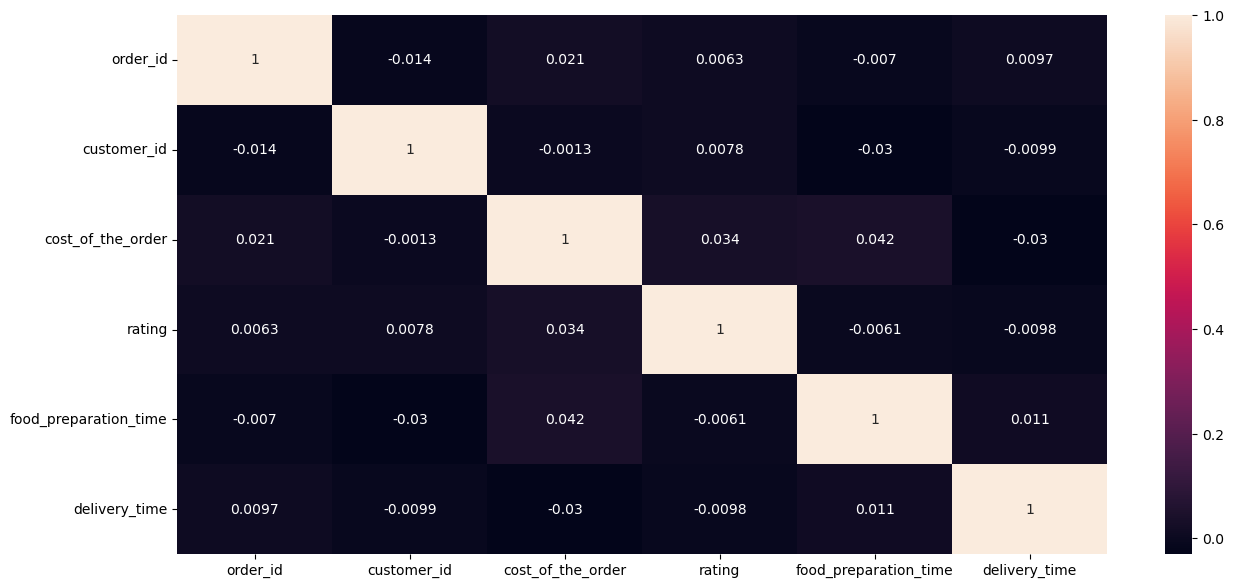

In [36]:
plt.figure(figsize=(15, 7))
df_numeric = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr(), annot=True)

plt.show()

The correlation matrix, rendered as a heatmap, shows weak correlation between variables overall.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [37]:
# Write the code here
# remove unrated restaurant from the list
df_rated = df.dropna().copy()

# rating counts of restaurant greater than 50
restaurant_rating_count = df_rated["restaurant_name"].value_counts()
restaurant_above_50_count = restaurant_rating_count[restaurant_rating_count > 50]

# Group by restaurant and calculate both count and mean of ratings
restaurant_stats = df_rated.groupby("restaurant_name")["rating"].agg(["count", "mean"])

# Filter restaurants that have more than 50 ratings and average rating greater than 4
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the eligible restaurants with their average rating
print(eligible_restaurants.sort_values(ascending=False, by="mean"))


                           count      mean
restaurant_name                           
The Meatball Shop             84  4.511905
Blue Ribbon Fried Chicken     64  4.328125
Shake Shack                  133  4.278195
Blue Ribbon Sushi             73  4.219178


#### Observations:


Shake Shack, The Meatball Shop, Blue Ribbo Sushi and Blue Ribbon Fried Chicken all qualify for the promotion.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [38]:
# Write the code here
# Define the commission rates based on the order cost
def calculate_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
    
# Apply the function to calculate the commission for each order
df["revenue"] = df["cost_of_the_order"].apply(calculate_revenue)

# Calculate the total net revenue
net_revenue = df["revenue"].sum()

print(f"The total net revenue generated by the company is: ${net_revenue:.2f}")

The total net revenue generated by the company is: $6166.30


#### Observations:


The total revenue is $6166.303 across all orders.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [39]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60 =  df[df["total_time"] > 60]

percentage_of_time_greater_than_60 = (df_greater_than_60.shape[0])/(df.shape[0])*100


print(f"Percentage of orders taking more than 60 minutes to get delivered: {percentage_of_time_greater_than_60:.2f}%")

Percentage of orders taking more than 60 minutes to get delivered: 10.54%


#### Observations:


Around 10.54% of all orders take more than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [40]:
result = df.groupby('day_of_the_week')['delivery_time'].agg(['mean','count','std'])
display(result)

,mean,count,std
day_of_the_week,,,
Weekday,28.340037,547,2.891428
Weekend,22.470022,1351,4.628938


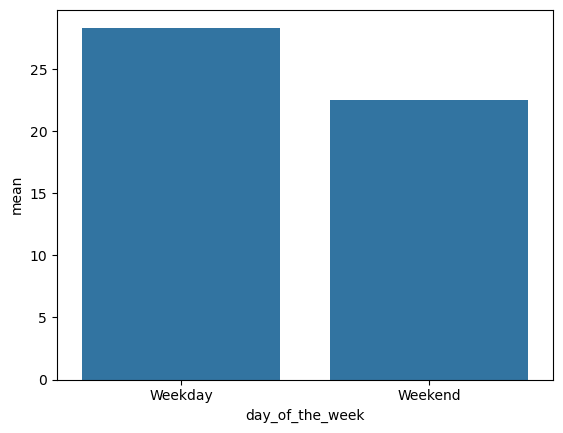

In [41]:
sns.barplot(data=result,y='mean',x=result.index)

plt.show()

#### Observations:


On weekends, the average delivery time is noticeably lower, but it is also more variable. This is especially noteworthy in light of the fact that there are much more orders on weekends. This could imply more predictability but worse traffic throughout the workdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
- The impact of feedback ratings is uncertain, partly due to the high percentage of missing ratings (39%), which may skew results.
- The absence of feedback might suggest customer dissatisfaction, while mid-range ratings could also imply dissatisfaction, potentially influenced by courtesy bias.
- Emotional and sentimental factors seem to play a role in cuisine selection, with well-known or globally popular types such as American, Japanese, Italian, and Chinese being favored.
- Another factor influencing customer behavior could be the perceived relationship between cost and value.
- Further research is needed to understand target demographics and how order costs vary across different customer groups, and to explore the correlation between order costs and specific features.
- Predictable and consistent delivery times might also shape customers' perception of the service's value.

### Recommendations:

#### 1. Enhance Customer Feedback Mechanisms

- Implement a tiered incentive system for detailed feedback
- Integrate brief, targeted surveys into the app's post-delivery experience

#### 2. Conduct In-depth Market Segmentation Analysis

- Analyze the multimodal distribution of order costs
- Develop targeted marketing strategies

#### 3. Optimize Delivery Operations

- Weekday Focus:
  - Analyze peak order times and adjust staffing accordingly
  - Implement route optimization algorithms to reduce total delivery time
- Weekend Improvements:
  - Investigate causes of delivery time variability on weekends
  - Consider incentives for delivery partners during high-demand weekend hours
  - Develop partnerships with restaurants to ensure faster preparation times during peak hours

#### 4. Conduct Sentiment Analysis Research

- Cuisine Perception:
  - Study cultural factors influencing cuisine preferences
  - Identify opportunities to introduce fusion or "gateway" dishes for less popular cuisines
- Delivery Time Impact:
  - Analyze the correlation between delivery time predictability and customer satisfaction
  - Implement a real-time delivery tracking feature to manage customer expectations
- Price-Value Relationship:
  - Research perceived value across different price points and cuisines
  - Identify optimal price ranges for maximum customer satisfaction and profitability

#### 5. Implement Strategic Improvements

- Pricing Strategies:
  - Develop dynamic pricing models based on demand, time of day, and customer segments
  - Offer bundled deals or meal combos to increase average order value
- Menu Optimization:
  - Work with restaurants to diversify menus of underperforming cuisine types
  - Encourage popular restaurants to offer exclusive dishes through the FoodHub platform
- Targeted Advertising:
  - Create educational content to familiarize customers with less popular cuisines
  - Use AI-driven recommendations to suggest new cuisines based on order history
  - Implement a "Cuisine of the Week" feature to highlight diverse options

#### 6. Continuous Improvement Framework

- Establish Key Performance Indicators (KPIs) for each recommendation
- Implement A/B testing for new features and strategies
- Conduct quarterly reviews to assess the impact of implemented changes
- Foster a culture of innovation by encouraging employee suggestions and customer feedback

---